In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Metrics for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Display a message indicating successful import
print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
file_path = '/content/StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(df.head())




First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teache

In [3]:
print("\nDataset information:")
df.info()



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence            

In [4]:

print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Handling missing values

# For numerical columns, we impute missing values using the mean
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

# Confirm that there are no missing values left
print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


<ipython-input-6-225e6d1c99f4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
<ipython-input-6-225e6d1c99f4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [7]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


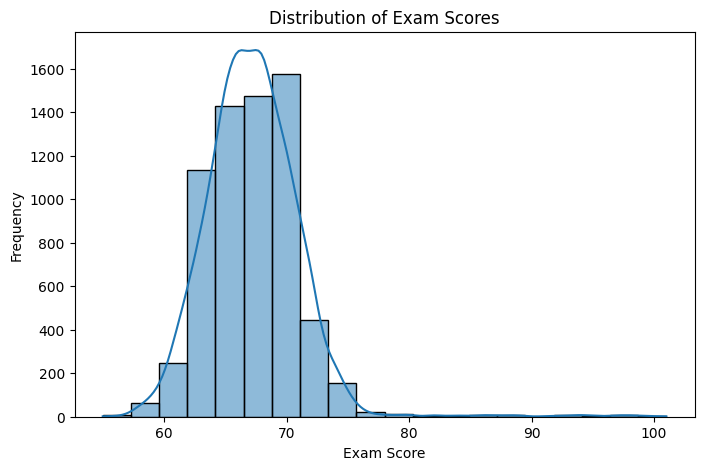

In [8]:
# Distribution of Exam Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


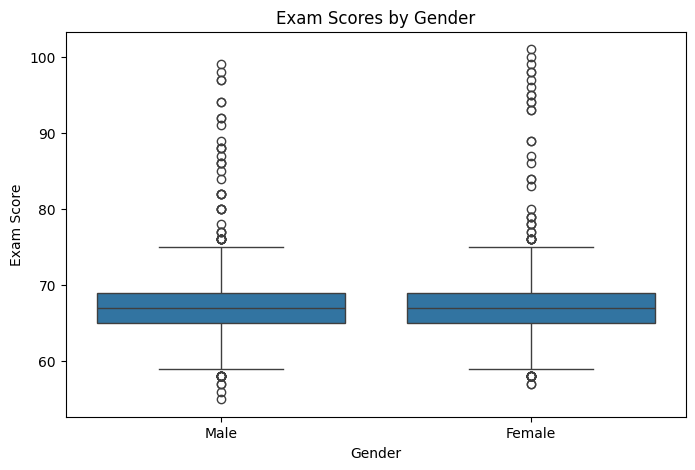

In [9]:
# Box Plot of Exam Scores by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Exam_Score', data=df)
plt.title('Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.show()


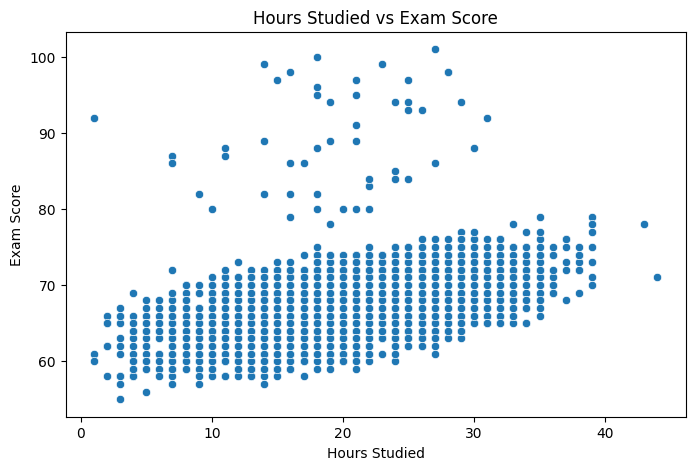

In [10]:
# Scatter plot: Hours Studied vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()


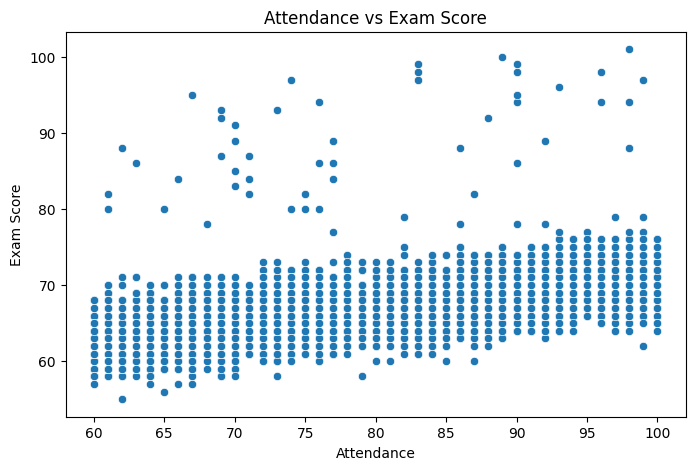

In [11]:
# Scatter plot: Attendance vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()


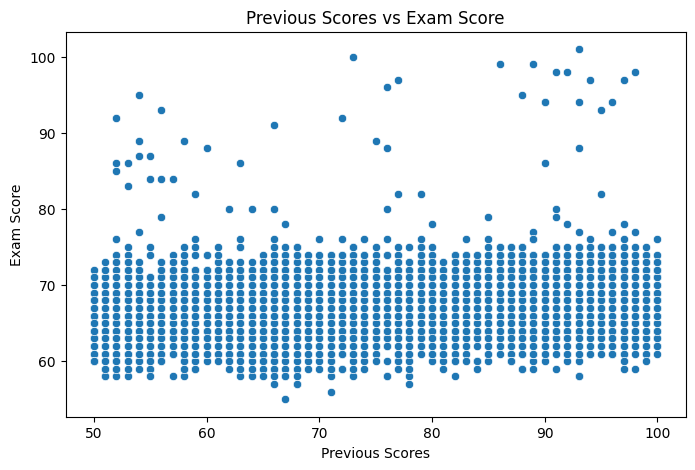

In [12]:
# Scatter plot: Previous Scores vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df)
plt.title('Previous Scores vs Exam Score')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.show()


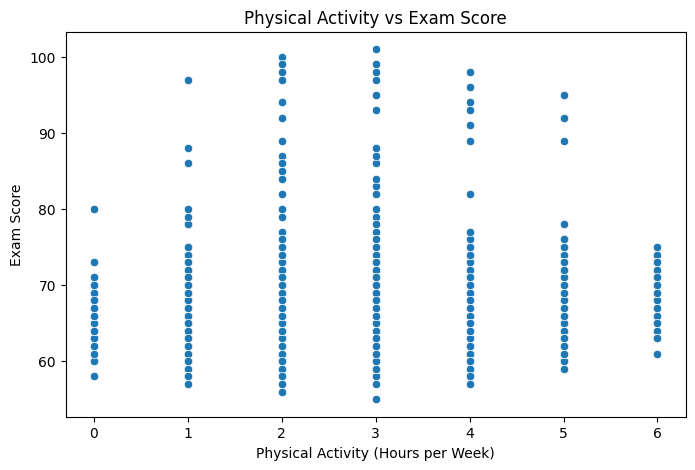

In [13]:
# Scatter plot: Physical Activity vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Physical_Activity', y='Exam_Score', data=df)
plt.title('Physical Activity vs Exam Score')
plt.xlabel('Physical Activity (Hours per Week)')
plt.ylabel('Exam Score')
plt.show()



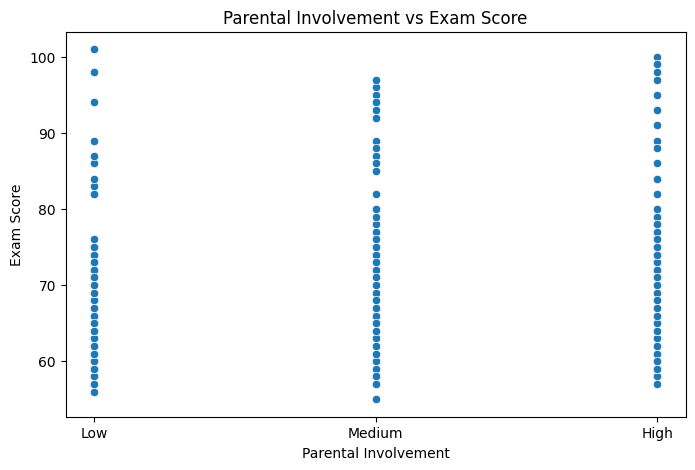

In [14]:
# Bar Plot of Parental Involvement vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Parental Involvement vs Exam Score')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()


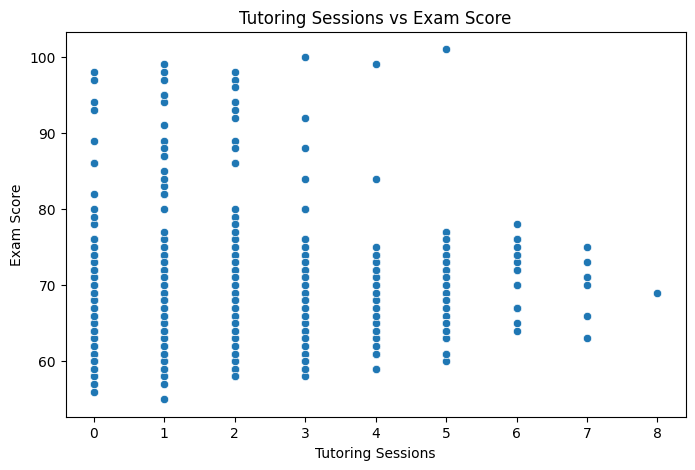

In [15]:
# Bar Plot of Tutoring Sessions vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=df)
plt.title('Tutoring Sessions vs Exam Score')
plt.xlabel('Tutoring Sessions')
plt.ylabel('Exam Score')
plt.show()


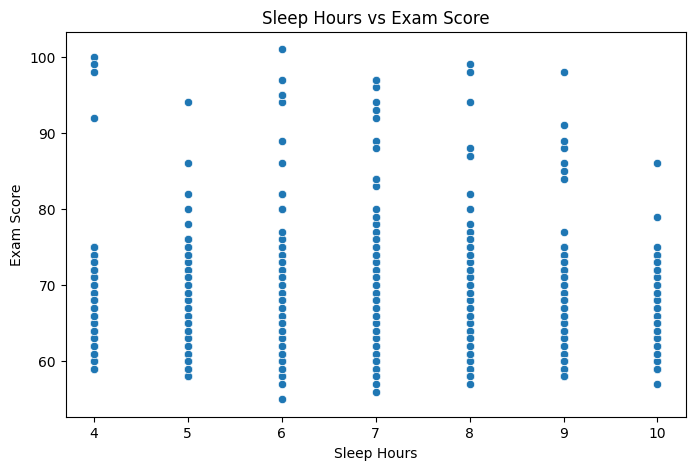

In [16]:
# Scatter Plot: Sleep Hours vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=df)
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()


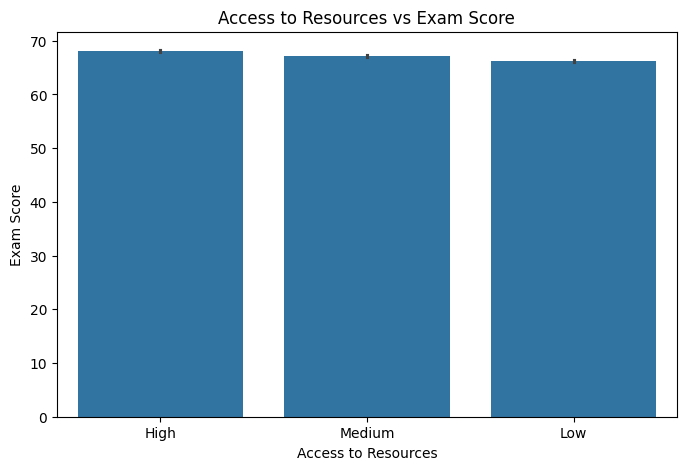

In [17]:
# Bar Plot of Access to Resources vs Exam Score
plt.figure(figsize=(8, 5))
sns.barplot(x='Access_to_Resources', y='Exam_Score', data=df)
plt.title('Access to Resources vs Exam Score')
plt.xlabel('Access to Resources')
plt.ylabel('Exam Score')
plt.show()


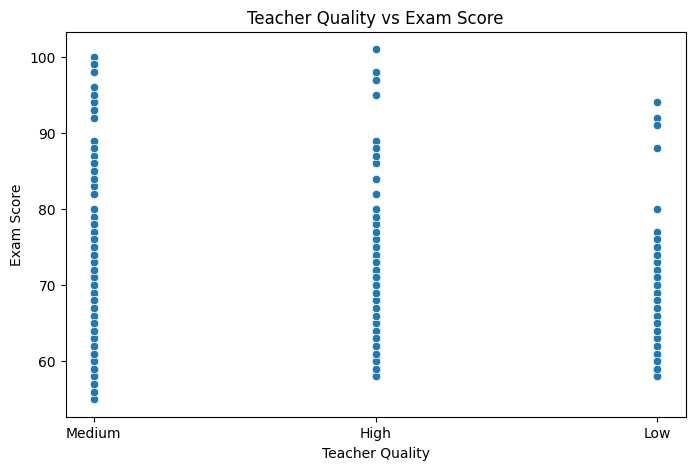

In [18]:
# Bar Plot of Teacher Quality vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Teacher_Quality', y='Exam_Score', data=df)
plt.title('Teacher Quality vs Exam Score')
plt.xlabel('Teacher Quality')
plt.ylabel('Exam Score')
plt.show()


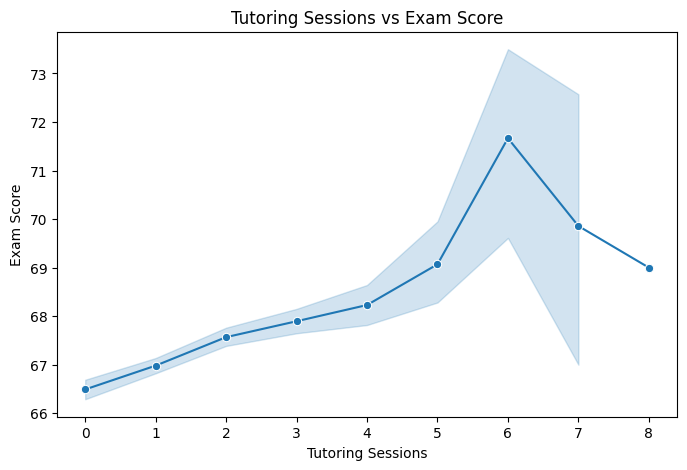

In [19]:
# Line Plot of Tutoring Sessions vs Exam Score
plt.figure(figsize=(8, 5))
sns.lineplot(x='Tutoring_Sessions', y='Exam_Score', data=df, marker='o')
plt.title('Tutoring Sessions vs Exam Score')
plt.xlabel('Tutoring Sessions')
plt.ylabel('Exam Score')
plt.show()


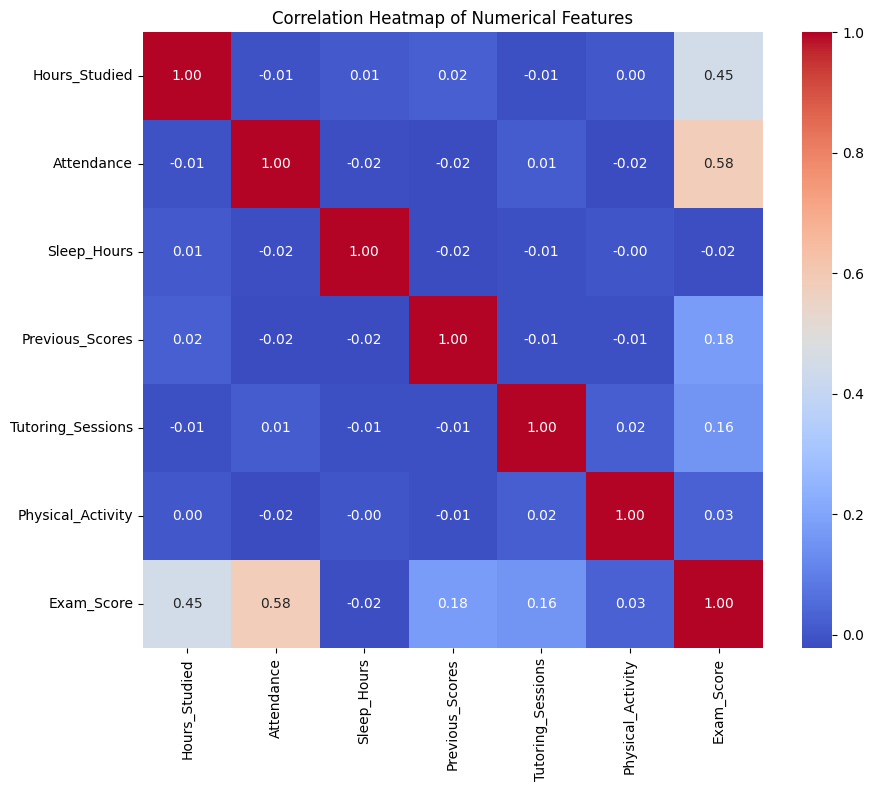

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [20]:
# Identify categorical columns for encoding
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                       'Parental_Education_Level', 'Distance_from_Home', 'Gender']

# Applying one-hot encoding to the categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset to check the result
print("First 5 rows of the encoded dataset:")
print(df_encoded.head())

# Checking the new shape of the encoded dataset
print("\nShape of the dataset after encoding:", df_encoded.shape)


First 5 rows of the encoded dataset:
   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Exam_Score  Parental_Involvement_Low  \
0                  3          67                      True   
1                  4          61                      True   
2                  4          74                     False   
3                  4          71                      True   
4                  4          70                     False   

   Parental_Involvement_Medium  Access_to_Resources_Low  ...  \
0                        False         

In [21]:
# Splitting the dataset into features (X) and target (y)
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting splits
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5285, 27)
Shape of X_test: (1322, 27)
Shape of y_train: (5285,)
Shape of y_test: (1322,)


In [22]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_forest = forest_model.predict(X_test_scaled)

# Model Evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluating Linear Regression
mae_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)

# Evaluating Decision Tree Regressor
mae_tree, rmse_tree, r2_tree = evaluate_model(y_test, y_pred_tree)

# Evaluating Random Forest Regressor
mae_forest, rmse_forest, r2_forest = evaluate_model(y_test, y_pred_forest)

# Displaying the results
print("Linear Regression - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(mae_linear, rmse_linear, r2_linear))
print("Decision Tree Regressor - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(mae_tree, rmse_tree, r2_tree))
print("Random Forest Regressor - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(mae_forest, rmse_forest, r2_forest))


Linear Regression - MAE: 0.45, RMSE: 1.80, R-squared: 0.77
Decision Tree Regressor - MAE: 1.89, RMSE: 3.77, R-squared: -0.00
Random Forest Regressor - MAE: 1.18, RMSE: 2.23, R-squared: 0.65


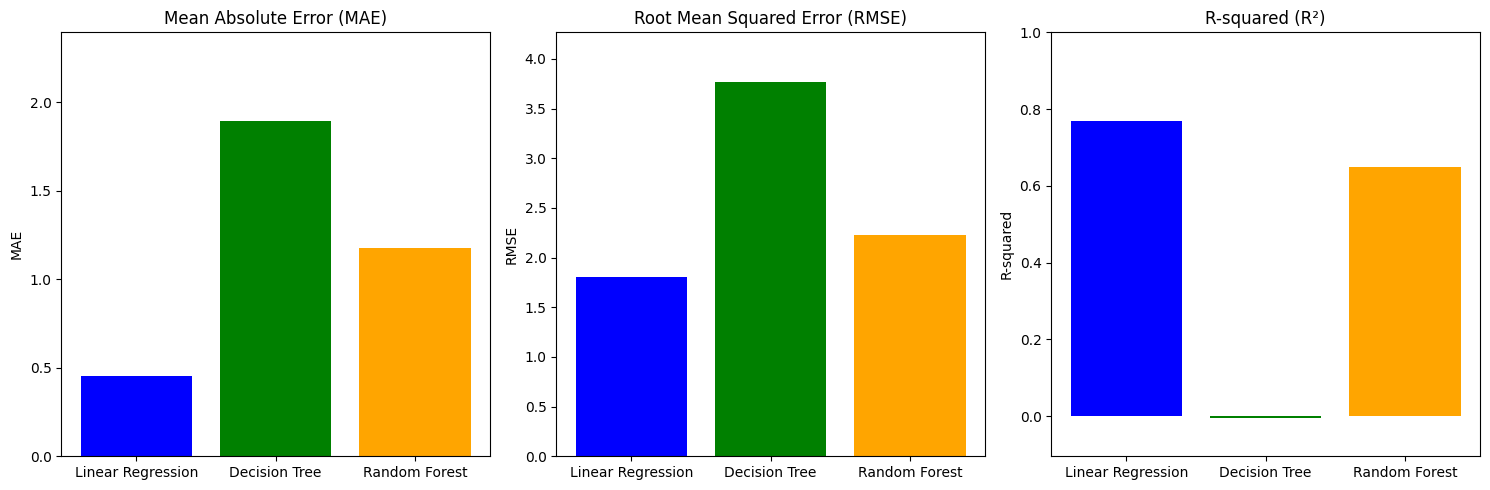

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_scores = [mae_linear, mae_tree, mae_forest]
rmse_scores = [rmse_linear, rmse_tree, rmse_forest]
r2_scores = [r2_linear, r2_tree, r2_forest]

# Create subplots to show the comparison of MAE, RMSE, and R-squared
plt.figure(figsize=(15, 5))

# MAE comparison
plt.subplot(1, 3, 1)
plt.bar(models, mae_scores, color=['blue', 'green', 'orange'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.ylim(0, max(mae_scores) + 0.5)

# RMSE comparison
plt.subplot(1, 3, 2)
plt.bar(models, rmse_scores, color=['blue', 'green', 'orange'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_scores) + 0.5)

# R-squared comparison
plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.title('R-squared (R²)')
plt.ylabel('R-squared')
plt.ylim(min(r2_scores) - 0.1, 1)

# Display the plots
plt.tight_layout()
plt.show()


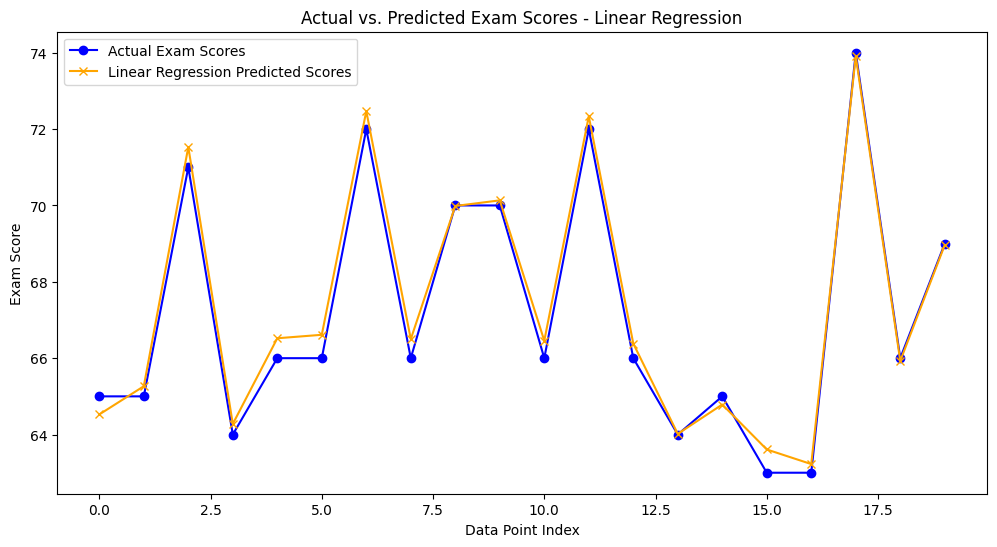

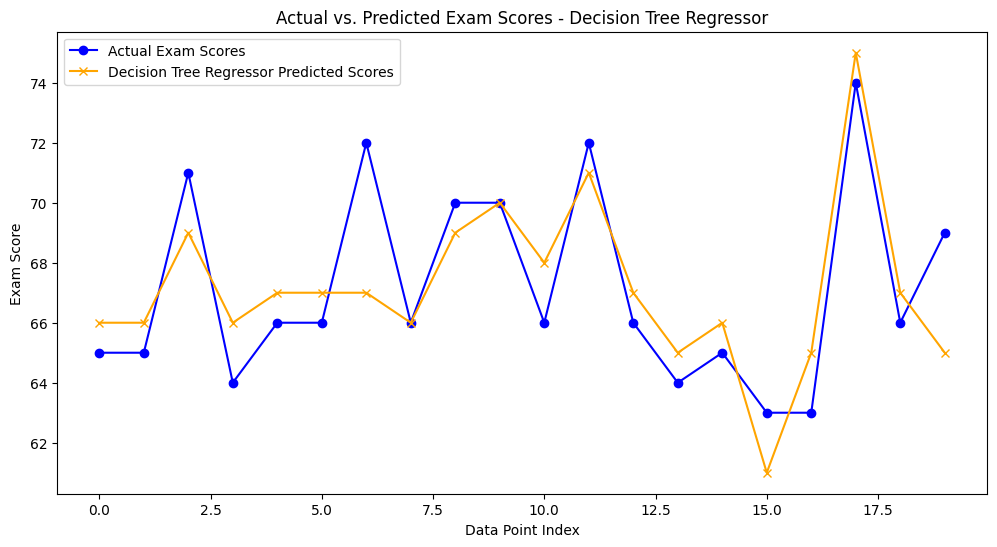

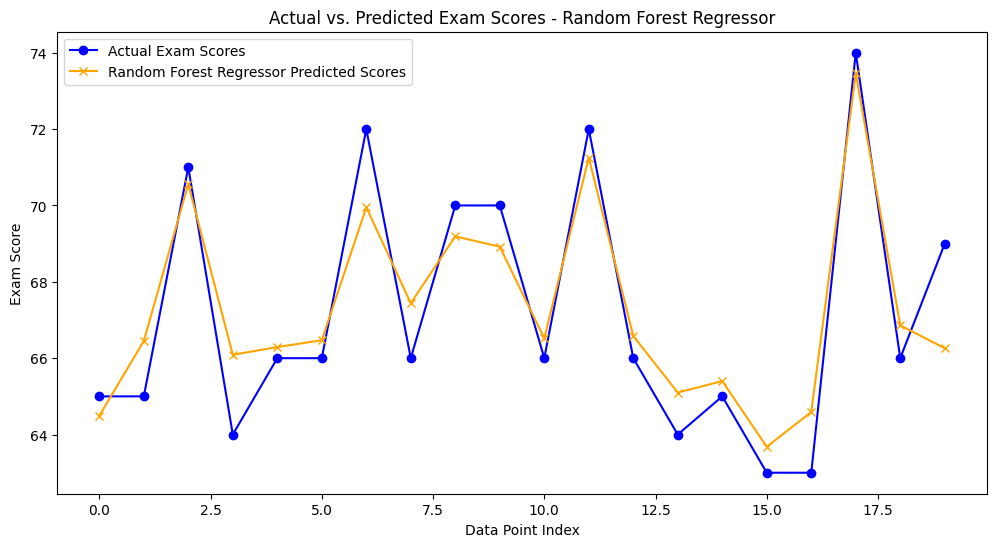

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot Actual vs Predicted scores using line plot
def plot_line_comparison(y_test, y_pred, model_name):
    # Create index for each data point
    indices = np.arange(len(y_test))

    plt.figure(figsize=(12, 6))

    # Plot actual values
    plt.plot(indices, y_test, label='Actual Exam Scores', color='blue', marker='o')

    # Plot predicted values
    plt.plot(indices, y_pred, label=f'{model_name} Predicted Scores', color='orange', marker='x')

    # Add labels and title
    plt.xlabel("Data Point Index")
    plt.ylabel("Exam Score")
    plt.title(f"Actual vs. Predicted Exam Scores - {model_name}")
    plt.legend()
    plt.show()

# Plot for Linear Regression
plot_line_comparison(y_test[:20], y_pred_linear[:20], "Linear Regression")  # Plotting first 20 data points for readability

# Plot for Decision Tree Regressor
plot_line_comparison(y_test[:20], y_pred_tree[:20], "Decision Tree Regressor")

# Plot for Random Forest Regressor
plot_line_comparison(y_test[:20], y_pred_forest[:20], "Random Forest Regressor")
